# Ladybird Analysis

# Compare the mean sizes of low and high predated two-spot ladybird populations

<div class="alert alert-success">

For this solution I am using ladybird data collected from one of last year's groups.
</div>

<div class="alert alert-success">

# Part 1: Exploring your data
</div>

## Task 1.2: Read in and print the low and high predation samples to check the data are okay

Using pandas, read in your excel spreadsheet and call it something sensible.

In [2]:
# read and print your ladybird size dataset
import pandas as pd

ladybirds = pd.read_excel('ladybird_sizes_demo.xlsx')

ladybirds

,low,high
0,3.5,4.5
1,4.0,6.0
2,4.0,6.0
3,5.0,6.5
4,4.0,6.0
...,...,...
60,4.8,NaN
61,5.3,NaN
62,5.0,NaN
63,4.5,NaN


## Task 1.3: Plot the samples in a histogram to see how they are distributed

Plot the distributions of the low and high predation samples as histograms in a single annotated graph. 


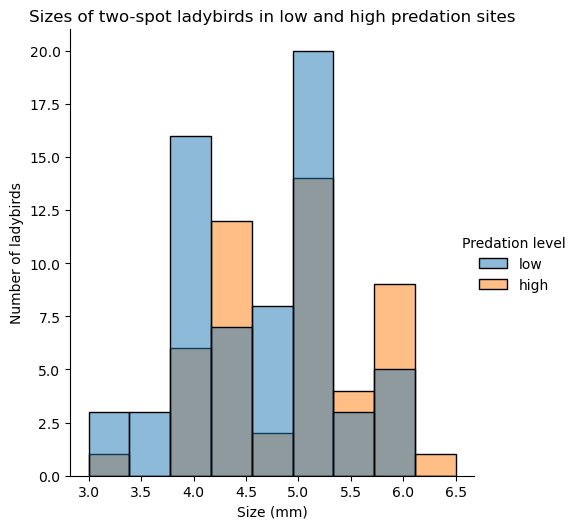

In [6]:
# annotated histograms of samples of two-spot ladybird sizes from low and high predation cemeteries
%matplotlib inline
import seaborn as sns

g = sns.displot(ladybirds)
g.ax.set_xlabel('Size (mm)')
g.ax.set_ylabel('Number of ladybirds')
g.ax.set_title('Sizes of two-spot ladybirds in low and high predation sites')
g.legend.set_title('Predation level');

## Task 1.4: The distributions might be clearer in a boxplot

Plot the distributions of the low and high predation samples in an annotated boxplot. 


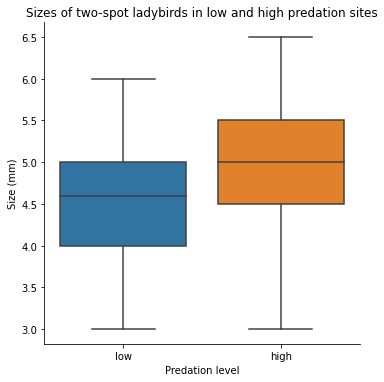

In [4]:
# a boxplot to visually compare ladybird sizes from low and high predation cemeteries 

g = sns.catplot(data=ladybirds, kind='box')
g.ax.set_ylabel('Size (mm)')
g.ax.set_xlabel('Predation level')
g.ax.set_title('Sizes of two-spot ladybirds in low and high predation sites');

## Task 1.5: What does the box and the various lines in a boxplot represent?

> The boxes represent the middle 50% of data. Also called the inter-quartile range. The horizontal line in the box is the median value. Half the data lie above it and half below it. The whiskers represent most of the rest of the data. Their lengths are 1.5 times the inter-quartile range.

## Task 1.6: Eye-ball estimates of the means and standard deviations

Using your histograms or boxplots, estimate the means and standard deviations of ladybird sizes from both cemeteries. Remember that a rough estimate of the standard deviation is given by this formula

$$s \approx \frac{\mathrm{max\ value} - \mathrm{min\ value}}{4}$$


> low: xbar = 4.5 mm, s = 0.75 mm

> high: xbar = 5 mm, s = 0.88 mm

## Task 1.7: Calculate the sample sizes, means and standard deviations

Calculate the sample sizes, means and standard deviations of the two samples and print to the appropriate number of decimal places.

In [5]:
# sample sizes, sample means and sample standard deviations of both samples

n = ladybirds.count()
xbar = ladybirds.mean()
s = ladybirds.std()

print('Sample sizes, n')
print(n)
print() # Blank line

print('Sample means to 2dp, xbar')
print(round(xbar, 2))
print() # Blank line

print('Sample standard deviations to 2dp, s')
print(round(s, 2))

Sample sizes, n
low     65
high    49
dtype: int64

Sample means to 2dp, xbar
low     4.62
high    4.97
dtype: float64

Sample standard deviations to 2dp, s
low     0.74
high    0.74
dtype: float64


## Task 1.8: Calculate the *d*-statistic: the absolute difference in sample means

Using the sample means you just calculated, calculate, using Python code, the absolute difference in sample means. We will call this the *d*-statistic. is.

In [6]:
# calculate your observed d-statistic: difference in sample means

d = abs(xbar['high'] - xbar['low'])

print(f'difference in observed beak depths = {d:.2f} mm')

difference in observed beak depths = 0.35 mm


## Task 1.9: Take a guess on whether the population means are the same or different?

Based on the plots and your calculated means, take a guess on whether mean ladybird sizes of the two **populations**, from which your two samples are drawn, are the same, or are different, or can't you tell (is there too much overlap of the two distributions)?

Give a reason for your answer.

> Although there is a difference in the sample means, there is a lot of overlap between ladybird sizes in the two sites. Therefore, it's not clear if there is a significant difference in the population means.

## Task 1.10: Is the mean of the high predation sample *smaller* than the mean of the low predation sample?

Our prediction is that two-spot ladybirds in the high predation cemetery will have a *larger* mean size than ladybirds in the low predation cemetery. Is that the case in your data?

If the opposite is true then your data do not support our biological hypothesis that Harlequin ladybirds prefer to predate on small two-spot ladybirds. List three potential reasons why your data show the opposite to our prediction.

> The mean of the high predation cemetery is higher than the mean of the low predation cemetery. This is in accordance with our prediction.

<div class="alert alert-success">


# Part 2: How likely is the observed difference in your sample means (the *d*-statistic) if the null hypothesis were true? The *p*-value.
</div>

## Task 2.1: Construct a statistical model of the null hypothesis

State the mean ($\mu$) and standard deviation ($\sigma$) of the normal distribution of your statistical model.

> We'll use the average values of the sample means and standard deviations for our mean and standard deviation of our statistical model.

> mu = 4.8 mm

> sigma = 0.74 mm

## Task 2.2: Simulate a pair of samples from the low and high predation populations under the null hypothesis and calculate the *d*-statistic

1. Write code to simulate randomly drawing a pair of samples, one each from the low and high predation populations. Remember, the sample sizes (i.e., the number of ladybirds measured) of these simulated samples must match those of your actual samples from the cemeteries. 
2. Print out the simulated ladybird sizes from both simulated samples.
3. Calculate and print the mean ladybird sizes of both simulated samples.
4. Calculate and print the *d*-statistic of this pair of simulated samples.


In [3]:
# using your statistical model, simulate a pair of random samples from the low and high predation populations assuming the null hypothesis were true and calculate the d-statistic

from numpy.random import normal

# Sample sizes from low and high. Use the observed sample sizes to avoid hard-coding them.
n = ladybirds.count()
n_low = n['low']
n_high = n['high']

# Set the populations' parameters. As we are assuming that the null model is true, both populations have identical parameters.
mu = 4.8
sigma = 0.74

# Sample ladybirds from low and store them in a list called sample_low
sample_low = normal(mu, sigma, n_low)
# Sample ladybirds from high and store them in a list called sample_high
sample_high = normal(mu, sigma, n_high)

# Print samples
print(sample_low)
print(sample_high)
print()

# Calculate sample means
xbar_low = sample_low.mean()
xbar_high = sample_high.mean()

# Print sample means to 2dp
print(f'sample mean ladybird size from low predation site  = {xbar_low:.2f} mm')
print(f'sample mean ladybird size from high predation site = {xbar_high:.2f} mm')

# Calculate and print the d-statistic
d = abs(xbar_high - xbar_low)

print() # blank line
print(f'difference in sample mean ladybird sizes, d-statistic = {xbar_high:.2f} - {xbar_low:.2f} = {d:.2f}')

[5.35876604 3.58774071 4.62288971 4.23380993 5.58684085 6.34541625
 5.3879251  6.04088971 3.65422716 4.6133227  4.4728941  4.54613893
 4.13188075 4.30032191 5.69476004 5.78072472 5.36010969 5.26649197
 4.65429954 6.0628684  5.24434144 5.26224436 4.77591397 5.21912608
 4.58996471 5.66752769 5.16623593 5.30335512 4.77466126 5.00054748
 6.04469541 5.19781301 2.95614896 5.89017758 4.80552392 4.63435702
 3.31243054 4.53736014 5.31191854 4.74417538 4.16288601 5.54242416
 5.2774143  4.21433101 3.99818767 4.45265462 4.82937563 4.83121328
 4.10265138 3.60544727 4.29652532 5.53918627 5.12133454 5.38924498
 5.51404415 5.26376583 3.82055554 5.34184245 4.57485174 5.78148365
 4.55317185 4.13662974 5.01319237 3.75395444 4.48522051]
[4.90119906 3.9679767  4.61331878 4.97898384 5.81243411 4.6930756
 5.05878234 5.22333324 4.92677484 4.22298682 5.77640764 3.94442162
 5.13123336 4.95477873 4.04783452 5.71034089 5.16666246 3.98614752
 5.50632109 4.83854044 5.94914204 3.88463299 5.87398674 3.91155922
 4.072

## Task 2.3: Construct the sampling distribution of the *d*-statistic

Construct and plot the sampling distribution of the *d*-statistic under the null hypothesis. Do this by simulating thousands of pairs of samples and calculating the *d*-statistic for each.

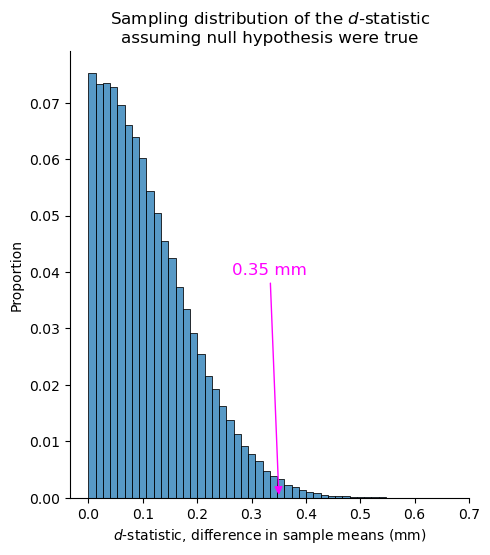

In [7]:
# construct and plot the sampling distribution of the d-statistic

import seaborn as sns
from numpy.random import normal

# Store the observed difference in sample mean beak depths in d_obs to avoid hard-coding data in the histogram
xbar = ladybirds.mean()
d_obs = abs(xbar['high'] - xbar['low'])

# Sample sizes from low and high
n = ladybirds.count()
n_low = n['low']
n_high = n['high']

# Set the populations's parameters. As we are assuming that the null model were true, both populations have identical parameters.
mu = 5.8
sigma = 0.74

# Set the number of samples to 100,000.
number_of_samples = 100000

# 100,000 random samples of ladybird sizes from the low population
samples_low = normal(mu, sigma, (n_low, number_of_samples))
# 100,000 random samples of ladybird sizes from the high population
samples_high = normal(mu, sigma, (n_high, number_of_samples))

# Calculate all sample means
xbars_low = samples_low.mean(axis=0)
xbars_high = samples_high.mean(axis=0)

# Calculate the d-statistic for each pair of samples
ds = abs(xbars_high - xbars_low)

# Sampling distribution of the d-statistic
g = sns.displot(ds, bins=50, stat='proportion')

# Add some annotation
g.ax.set_title('Sampling distribution of the $d$-statistic\nassuming null hypothesis were true')
g.ax.set_xlabel('$d$-statistic, difference in sample means (mm)')
g.ax.annotate(f'{d_obs:.2f} mm', (d_obs, 0), (0.5, 0.5), textcoords='axes fraction', color='magenta', fontsize=12, arrowprops={'arrowstyle':'-|>', 'color':'magenta'}, ha='center'); # Add an arrow at the observed d-statistic

## Task 2.4: Is your observed *d*-statistic likely or not under the null hypothesis?

By eye-balling your constructed sampling distribution, do you think your observed *d*-statistic is likely or unlikely under the null hypothesis? 

Write your answer below with a justification.

> The observed difference in sample means (0.35mm)  is far into the tail of the sampling distribution. This suggests that 0.35 is unlikely under the null hypothesis and we probably have sufficient evidence to reject the null hypothesis? 

## Task 2.5: Calculate the *p*-value of your *d*-statistic

Calculate the *p*-value of your *d*-statistic. 

In [8]:
# calculate and print the p-value of your observed d-statistic under the null hypothesis

# Set a tally for the number of times the absolute value of the d-statistic is at least 0.35 mm
count = 0

# Loop through all simulated values of d
for d in ds:
    
    # Increment tally if d is greater than 0.35 mm or less than -0.35 mm
    if d > d_obs:
        count += 1
        
# Calculate the p-value 
# (the number of samples in which the difference is at least 0.35 divided by the total number of samples)
p_value = count / len(ds)

# Print the p-value
print(f'p-value = {p_value:.3f}')

p-value = 0.012


<div class="alert alert-success">

# Part 3: Two-sample *t*-test in practice
</div>

## Task 3.1: Perform a two-sample *t*-test

Perform a two-sample *t*-test on your data using Python code.

In [9]:
# perform a two-sample t-test on your data

from scipy.stats import ttest_ind # import the two sample t-test function

# Perform the two sample t-test
t, p = ttest_ind(ladybirds['high'], ladybirds['low'], nan_policy='omit')

# Print the t-statistic to 2dp
print(f't-statistic = {t:.2f}')

# Print the p-value to 4dp
print(f'p-value = {p:.3f}')

t-statistic = 2.49
p-value = 0.014


## Task 3.2: Reject or not reject your null hypothesis

Based on your *p*-value and a confidence level of $\alpha=$ 0.05. Do you reject or not reject your null hypothesis that mean ladybird sizes are the same in cemeteries with low and high predation rates?

> p=0.14 which is less than 0.05. We therefore reject the null hypothesis that the average size of ladybirds are the same in the low and high predation cemeteries.

## Task 3.3: Report the result of your test

Report the outcome of your test in words, as you might write in a report.


> Sizes of two-spot ladybirds were measured in two different cemeteries in Edinburgh that experience different levels of Harlequin ladybird predation.  A statistically significant difference was found of 0.35 mm between ladybird sizes of the two cemeteries (*t*(112) = 2.49, *p* = 0.014). This evidence supports the hypothesis that the Harlequin ladybirds prefer to predate upon smaller rather than larger two-spot ladybirds.